In [2]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union

from directed_graph_generators.directed_stochastic_block_model import DirectedStochasticBlockModel

# Coupling Times
We will take a collection of directed graphs and look at the distribution of Markovian coupling times for random walks on them where the walks start on each node. 

In [22]:
# Set the random seed for reproducibility
np.random.seed(42)
def random_walker(A:np.array, start:Union[int, np.array], T:int):
    """
    Simulate a random walk on the graph G starting at node start for T steps.
    """
    # normalize the adjacency matrix
    A = A / A.sum(axis=1, keepdims=True)
    # initialize the path
    path = [start]
    for t in range(T-1):
        # get the neighbors of the current node
        neighbors = A[path[-1], :]
        if np.sum(neighbors) == 0:
            break
        path.append(np.random.choice(a = len(A), p=neighbors))
    return path

In [23]:
A = DirectedStochasticBlockModel(k=3,N=100,p=0.5,q=0.5,F = np.array([[0.5,1,0],[0,0.5,1],[1,0,0.5]])).adjacency_matrix
path = random_walker(A, start=0, T=1000)
print(path)


[0, 12, 57, 78, 25, 63, 92, 97, 19, 20, 46, 83, 3, 52, 33, 73, 14, 43, 50, 90, 72, 77, 96, 75, 94, 1, 20, 15, 17, 54, 36, 69, 32, 35, 70, 86, 4, 29, 46, 83, 21, 58, 54, 66, 0, 44, 84, 10, 27, 57, 56, 48, 82, 7, 60, 42, 79, 28, 58, 40, 82, 29, 42, 69, 78, 93, 7, 1, 53, 38, 96, 30, 42, 52, 58, 77, 93, 98, 10, 19, 4, 57, 51, 33, 54, 61, 98, 29, 22, 31, 29, 2, 9, 46, 49, 45, 56, 80, 70, 78, 66, 76, 0, 63, 40, 69, 80, 28, 63, 70, 92, 91, 97, 90, 93, 73, 17, 10, 46, 97, 82, 95, 78, 9, 18, 38, 47, 76, 97, 84, 24, 0, 20, 37, 67, 4, 35, 54, 94, 9, 4, 8, 15, 46, 86, 24, 44, 64, 82, 3, 27, 58, 90, 81, 12, 22, 63, 40, 49, 39, 60, 48, 75, 24, 62, 37, 67, 69, 32, 34, 84, 7, 55, 69, 5, 57, 75, 8, 2, 9, 38, 48, 52, 33, 82, 84, 77, 5, 58, 77, 91, 25, 34, 83, 2, 42, 83, 82, 95, 75, 11, 1, 32, 34, 40, 45, 72, 76, 97, 84, 77, 71, 96, 32, 60, 96, 93, 21, 14, 11, 3, 8, 10, 28, 39, 84, 15, 46, 83, 29, 61, 47, 45, 61, 47, 74, 24, 13, 12, 29, 45, 71, 10, 16, 1, 0, 59, 36, 83, 93, 7, 36, 98, 89, 26, 54, 92, 24,

In [21]:
len(path)

1001

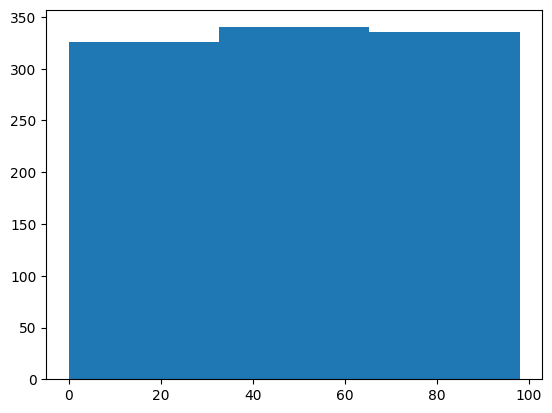

In [13]:
# Plot the path
plt.hist(path, bins=3)
plt.show()

In [39]:
# producing multiple random walks starting at each node and then determining the coupling times of each pair of nodes
def coupling_times(A:np.array, T:int):
    n = len(A)
    # initialize the paths
    paths = np.zeros((n, T))
    for i in range(n):
        paths[i, :] = random_walker(A, start=i, T=T)
    
    coupling_times = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                # find the first time the paths cross
                try:
                    first_crossing = np.where(paths[i, :] == paths[j, :])[0][0]
                except:
                    first_crossing = T
                # if the paths never cross, set the coupling time to T
                if first_crossing == 0:
                    first_crossing = T
                # set the coupling time to the first crossing
                coupling_times[i, j] = first_crossing
    return coupling_times

In [40]:
coupling_times_array = coupling_times(A, T=1000)
coupling_times_array = [coupling_times_array + coupling_times(A, T=1000) for i in range(100)]

In [42]:
coupling_times_array_sum = coupling_times_array[0]
for i in range(1, len(coupling_times_array)):
    coupling_times_array_sum += coupling_times_array[i]
coupling_times_array_mean = coupling_times_array_sum / len(coupling_times_array)

<AxesSubplot: >

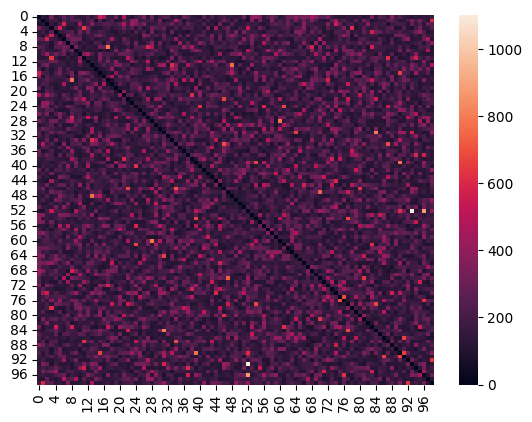

In [43]:
sns.heatmap(coupling_times_array_mean)

<AxesSubplot: >

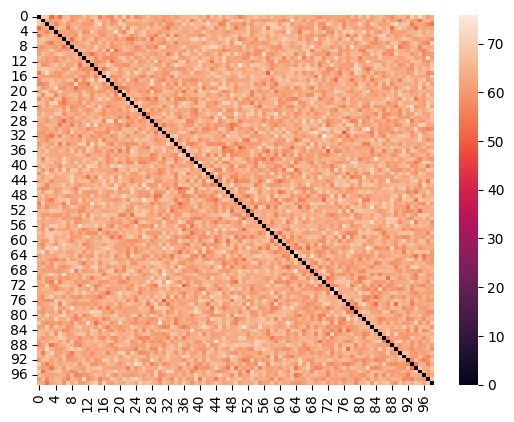

In [46]:
#Trying again with a shorter walk length
coupling_times_array = coupling_times(A, T=100)
coupling_times_array = [coupling_times(A, T=100) for i in range(100)]
coupling_times_array_sum  = coupling_times_array[0]
for i in range(1, len(coupling_times_array)):
    coupling_times_array_sum += coupling_times_array[i]
coupling_times_array_mean = coupling_times_array_sum / len(coupling_times_array)

sns.heatmap(coupling_times_array_mean)

<AxesSubplot: >

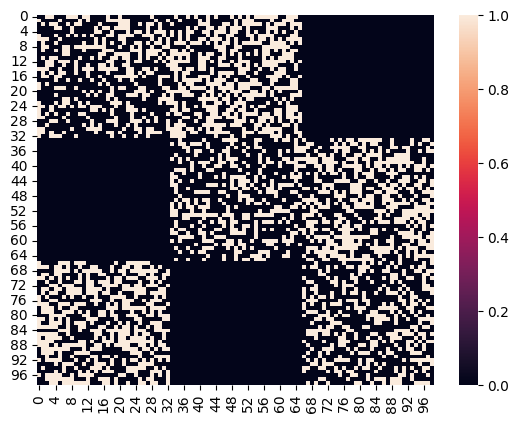

In [47]:
sns.heatmap(A)

In [54]:
# make a 4 cycle permutation matrix
P = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
P = P + np.eye(4)
P @ P.T

array([[4., 0., 0., 0.],
       [0., 2., 2., 0.],
       [0., 2., 2., 0.],
       [0., 0., 0., 4.]])

In [55]:
P.T @ P

array([[4., 0., 0., 0.],
       [0., 2., 2., 0.],
       [0., 2., 2., 0.],
       [0., 0., 0., 4.]])